<table style="width: 100%; font-size: 26px; direction: rtl;">
  <tr>
    <td style="text-align: right;">نور الدين امجد عبد الفتاح احمد محمد علوه</td>
    <td style="text-align: left;">ID: 23011596</td>
  </tr>
  <tr>
    <td style="text-align: right;">علي ابوبكر كمال محمود </td>
    <td style="text-align: left;">ID: 23012267</td>
  </tr>
  <tr>
    <td style="text-align: right;">عبد الله نجاح محمد حسن</td>
    <td style="text-align: left;">ID: 23011356</td>
  </tr>
</table>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

# 1. Logistic Regression with Classification

## 1.1 Preprocessing

[Data link](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression/data)

In [3]:
df = pd.read_csv("framingham.csv") 
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.drop(columns = "education", inplace = True) # droping unnecessary column

In [5]:
df.shape

(4238, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4209 non-null   float64
 4   BPMeds           4185 non-null   float64
 5   prevalentStroke  4238 non-null   int64  
 6   prevalentHyp     4238 non-null   int64  
 7   diabetes         4238 non-null   int64  
 8   totChol          4188 non-null   float64
 9   sysBP            4238 non-null   float64
 10  diaBP            4238 non-null   float64
 11  BMI              4219 non-null   float64
 12  heartRate        4237 non-null   float64
 13  glucose          3850 non-null   float64
 14  TenYearCHD       4238 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 496.8 KB


In [7]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [8]:
df.isna().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [13]:
df.dropna(inplace = True)
df.shape

(3749, 15)

In [14]:
#Split the data into training and testing sets (e.g., 80/20)
X = df.drop(["TenYearCHD"], axis = 1)
Y = df["TenYearCHD"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

![z-score normilzation](https://miro.medium.com/v2/da:true/resize:fit:400/1*13XKCXQc7eabfZbRzkvGvA.gif)

In [15]:
#applying Standard normalization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 1.2 Modeling with Logistic Regression

$$
\Large z = \theta^T x \quad \text{where} \quad x_0 = 1
$$
$$
\Large h_{\theta}(x) = \frac{1}{1 + e^{-z}}
$$

In [16]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(X_train_scaled, Y_train)

LogisticRegression()

In [17]:
y_train_pred = logistic_model.predict(X_train_scaled)
y_test_pred = logistic_model.predict(X_test_scaled)

training_acc = accuracy_score(Y_train, y_train_pred)
testing_acc = accuracy_score(Y_test, y_test_pred)

print(f"Training accuracy : {training_acc: .4f}")
print(f"Testing accuracy : {testing_acc: .4f}")

Training accuracy :  0.8550
Testing accuracy :  0.8440


## 1.3 Model Evaluation

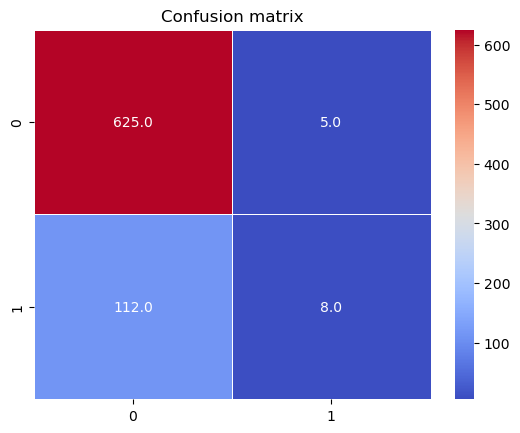

In [18]:
cf_matrix = confusion_matrix(Y_test, y_test_pred)
sns.heatmap(cf_matrix, annot = True, linewidths = 0.5, cmap='coolwarm', fmt = '0.1f')
plt.title("Confusion matrix")
plt.show()